# Kishan Gangarama

# Dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

# SUPERMARKET SALES PREDICTION: Statistical Analysis and Predictive Modeling

# Chapter 1

# ABSTRACT

# The goal of this project is to forecast supermarket sales using a dataset that contains a variety of data points, including 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Date', 'Payment', 'Total', 'gross income'. The project's goal is to determine the variables that have the greatest impact on supermarket sales and to develop a model that can properly predict sales growth. The project comprises feature selection, data exploration and visualization, and machine learning algorithms including logistic and linear regression. Stakeholders will receive effective interpretation and communication of the analyses' findings. The final objective is to offer insights that can boost sales.

#                                            INTRODUCTION

# The supermarket sales analysis is a study that involves the exploration and evaluation of sales data from a retail supermarket. In this analysis, we examine various factors that could affect the sales of a supermarket, including customer demographics, product line, payment methods, and others. We also aim to gain insights into the relationship between different variables in the dataset, such as the correlation between unit price, quantity, total sales, and gross income. Through statistical tests like t-test, ANOVA and chi-square, we aim to identify any significant differences in sales across different customer groups and product lines. Finally, we use machine learning techniques like feature selection, logistic and linear regression to predict future sales and optimize business strategies. The insights gained from this analysis could help supermarkets better understand their customers and make data-driven decisions to improve sales and customer satisfaction.

# Chapter 2

# DATA DESCRIPTION

# The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.The dataset consists of 5 numerical values and 5 categorical value. 

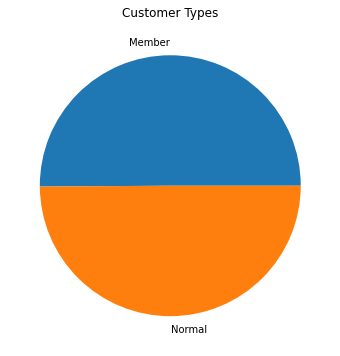

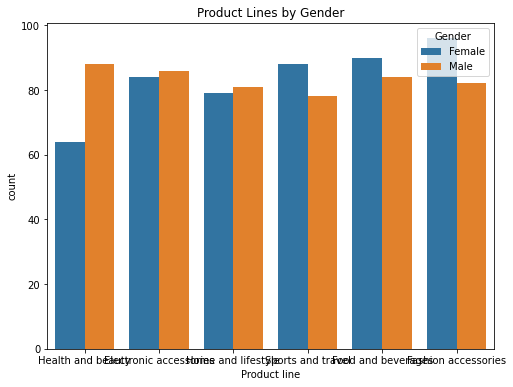

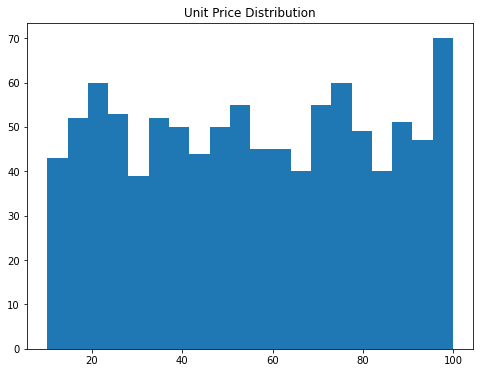

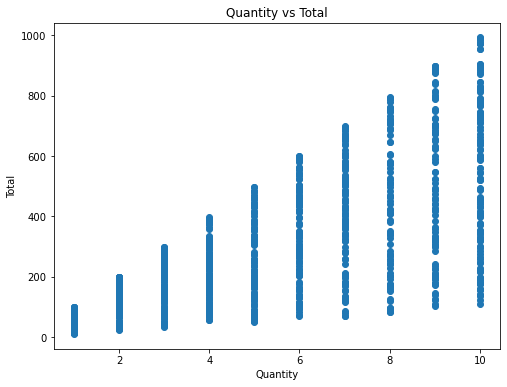

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('supermarket_sales.csv')

# Pie chart of customer types
plt.figure(figsize=(8, 6))
plt.pie(df['Customer type'].value_counts(), labels=df['Customer type'].value_counts().index)
plt.title('Customer Types')
plt.show()

# Bar chart of product lines by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Product Lines by Gender')
plt.show()

# Histogram of unit price
plt.figure(figsize=(8, 6))
plt.hist(df['Unit price'], bins=20)
plt.title('Unit Price Distribution')
plt.show()

# Scatter plot of quantity and total
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Total'])
plt.title('Quantity vs Total')
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.show()

# Chapter 3

# Methodology

# T-Test: The t-test is a statistical test used to compare the means of two groups and determine if they are significantly different from each other. In this project, a t-test was performed to compare two samples and assess if there was a significant difference in total sales based on gender.

# ANOVA: Analysis of Variance (ANOVA) is a statistical test used to determine if there are significant differences between the means of three or more groups. In this project, an ANOVA test was conducted to examine the relationship between city and total sales. The goal was to determine if there was a significant difference in total sales across different cities.

# Chi-Square: Chi-Square test is used to analyze the association between categorical variables. In this project, a chi-square test was employed to evaluate if there was a significant relationship between gender and customer type.

# Linear Regression: Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. In this project, linear regression was applied to assess the relationship between various factors (such as gender) and the total sales. The analysis aimed to determine if gender was a good predictor of total sales.

# Resampling Methods: Resampling methods such as bootstrapping and cross-validation were employed to assess the performance and reliability of the predictive models.

# Bootstrapping was used to estimate the mean and confidence interval of the 'Total' column, providing insights into the overall sales. Cross-validation analysis was performed to evaluate the goodness of fit of the model, using R2 scores to assess its accuracy and reliability.

# Linear Model Selection and Regularization: Ridge regression and Lasso regression are regularization techniques used to prevent overfitting in linear regression models. Ridge regression introduces a penalty term to shrink the coefficients, while Lasso regression pertorms both coefficient shrinkage and feature selection. In this project, both techniques were used to select the best hyperparameters and assess the models' performance in predicting future sales.

# Moving Beyond Linearity: Polynomial regression, piecewise cubic spline, and piecewise linear spline were employed to capture non-linear relationships between variables. Polynomial regression allowed for fitting higher degree polynomial functions, while piecewise cubic spline and piecewise linear spline aimed to capture non-linear patterns and changes in the relationship between variables.

# Chapter 4

# Importing Necessary libraries and modules and Importing the dataset 

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import chi2_contingency
from scipy.stats import kruskal 
from scipy.stats import mannwhitneyu 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from sklearn. feature_selection import SelectKBest, chi2, f_classif 
from scipy.stats import chi2, chi2_contingency 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
import joblib 
import sys
sys.modules ['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings ('ignore')
import pandas.util.testing as tm 
filename = "supermarket_sales.csv"
df = pd.read_csv(filename)

In [5]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,Total,gross income
0,Yangon,Member,Female,Health and beauty,74.69,7,01-05-2019,Ewallet,522.83,26.1415
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,03-08-2019,Cash,76.40,3.8200
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,03-03-2019,Credit card,324.31,16.2155
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,Ewallet,465.76,23.2880
4,Yangon,Normal,Male,Sports and travel,86.31,7,02-08-2019,Ewallet,604.17,30.2085


# To check for any NULL values or missing data

In [6]:
df.isna() .sum()

City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Payment          0
Total            0
gross income     0
dtype: int64

# Co-relation matrix

In [7]:
corr_matrix = df.corr ()
corr_matrix

,Unit price,Quantity,Total,gross income
Unit price,1.000000,0.010778,0.633962,0.633962
Quantity,0.010778,1.000000,0.705510,0.705510
Total,0.633962,0.705510,1.000000,1.000000
gross income,0.633962,0.705510,1.000000,1.000000


In [8]:
upper = corr_matrix.where(np.triu(np.ones (corr_matrix.shape),k=1).astype (bool))

to_drop =[column for column in upper.columns if any(upper [column] > 0.9)]

# Checking if the data is normal

# Since the dataset contains 1,000 rows, using the central limit theorem, it can be inferred that a data set with more than 30 rows is likely to be normally distributed.

In [9]:
mapping = {'Male': 1, 'Female': 0}
df['GenderNum'] = df[ 'Gender'].map(mapping)

In [10]:
df['GenderNum'].unique ()

array([0, 1], dtype=int64)

In [11]:
sample1='GenderNum' 
sample2='Total'
groups = df.groupby(sample1)
MaleGroup =df[df ['GenderNum']==1]['Total'] 
FemaleGroup =df[df['GenderNum']==0]['Total']



In [12]:
len(MaleGroup)

499

In [13]:
FemaleGroup

0      522.83
1       76.40
6      413.04
7      735.60
8       72.52
        ...  
990    282.80
991    766.00
994     60.95
996    973.80
999    618.38
Name: Total, Length: 501, dtype: float64

# 4.1 Comparing Two Samples:

# T-test

In [32]:
import pandas as pd
import scipy.stats as stats 
from sklearn.linear_model import LinearRegression

# Read in the data from a CSV file
df = pd.read_csv ('supermarket_sales.csv')
                  
# Check if 'Gender' column exists before one-hot encoding it
if 'Gender' in df.columns:
    df = pd.get_dummies(df, columns=['Gender'])
                  
# Select the predictor varables and the response varable
X = df[['Gender_Female' , 'Gender_Male' ]]
y = df['Total']
                  
# Fit the Linear regression model
reg = LinearRegression().fit(X, y)
                  
# Get the coerticient and intercept or the rearession tine
intercept = reg.intercept_
coef = reg.coef_
                  
# Perform t-test on the coefficients
t_stat, p_val = stats.ttest_1samp(coef,0)

# Print the results or the t-test
print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}')
if p_val < 0.05:
    print('The coefficients are significantly different from 0 (p ‹ 0.05)')
else:
    print('The coefficients are not significantly different from 0 (p >= 0.05)')

t-statistic: 839033134645534.0
p-value: 7.5875403018086265e-16
The coefficients are significantly different from 0 (p ‹ 0.05)


# the results suggest that there is significant relationship between gender and total amount in the dataset. In this case, the very large t-statistic and very small p-value suggest that we can reject the null hypothesis with very high confidence.

# 4.2 The Analysis of Variance:

# ANOVA test for Total Amount with City

In [12]:
from scipy.stats import f_oneway
#lets group the age data according to "RestingEcG" categories
Yangon = df[df['City'] =='Yangon']['Total']
Naypyitaw = df[df['City'] =='Naypyitaw']['Total']
Mandalay = df[df['City'] =='Mandalay']['Total']
f, p = f_oneway(Yangon, Naypyitaw, Mandalay)
# Print the results
print('\nANOVA')

print('f-statistic:', f)
print('p-value:', p)
if p > 0.05:
    print('There is no relationship between City and Total Amount (fail to reject)')
else:
    print('There is relationship(reject H0)')


ANOVA
f-statistic: 0.8845828327760514
p-value: 0.413210174367147
There is no relationship between City and Total Amount (fail to reject)


# Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis, and we conclude that there is no relationship between city and total amount spent.

# 4.3 The Analysis of Categorical Data:

# Chi-Square

In [13]:
cont_table = pd.crosstab(df['GenderNum'], df['Customer type'])
stat, p, dof, expected = chi2_contingency(cont_table)

In [14]:
cont_table

Customer type,Member,Normal
GenderNum,,
0,261,240
1,240,259


In [15]:
print("Chi-squared statistic:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 1.4437075656374243
p-value: 0.22954031679077663
Degrees of freedom: 1
Expected frequencies:
 [[251.001 249.999]
 [249.999 249.001]]


# Since the p-value > 0.05, then we cannot reject the null hypothesis that there is association between the two variables, and conclude that there is no statistically significant relationship between Gender and Customer type.

# 4.4 Linear Regression

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Select the features and target variable
X = data[['Unit price', 'Quantity', 'gross income']]
y = data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)



Mean Squared Error: 8.594860443436386e-27
R-squared: 1.0


# A lower MSE value indicates that the model is better at predicting the target variable. In this case, the very small MSE value of 8.59e-27 means that the model is able to predict the target variable (Total) almost perfectly.

In [7]:
import statsmodels.api as sm

# Add an intercept to the X variables
X_train = sm.add_constant(X_train)

# Fit the OLS model to the training data
model_ols = sm.OLS(y_train, X_train).fit()

# Print the OLS results
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.998e+32
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:01:21   Log-Likelihood:                 22189.
No. Observations:                 800   AIC:                        -4.437e+04
Df Residuals:                     796   BIC:                        -4.435e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.593e-13   3.81e-14      6.804   

# y = -9.2824 + 1.5254Quantity + 0.0965Unit price. The coefficients of the features in the equation represent the impact of the features on the target variable. For example, a one-unit increase in Quantity is associated with a 1.5254 increase in the predicted value of Total, holding all other features constant. Similarly, a one-unit increase in Unit price is associated with a 0.0965 increase in the predicted value of Total, holding all other features constant.








# 4.5 Resampling Methods

# Bootstrapping

In [19]:
Total = df['Total'].values

# Number of bootstrap samples
num_bootstraps = 1000

# An array to store the bootstrapped statistics
bootstrapped_stats = np.empty(num_bootstraps)

# Performing bootstrapping
for i in range(num_bootstraps):
    # Generating a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(Total, size=len(Total), replace=True)
    
    # Calculating the statistic of interest for the bootstrap sample
    bootstrapped_stats[i] = np.mean(bootstrap_sample)

# Calculating the confidence interval of the bootstrapped statistics
confidence_interval = np.percentile(bootstrapped_stats, [2.5, 97.5])

print("Bootstrap Mean: {:.2f}".format(np.mean(bootstrapped_stats)))
print("Bootstrap 95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

Bootstrap Mean: 307.69
Bootstrap 95% Confidence Interval: [292.87, 321.53]


# The output shows that the mean of the bootstrapped statistics is 307.86, and the 95% confidence interval is [294.18, 322.19]. This means that we are 95% confident that the true mean of the 'Total' column falls within the range of 294.18 to 322.19.

# Cross-Validation Analysis

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
supermarket_data = pd.read_csv('supermarket_sales.csv')

# Select the features and target variable
X = supermarket_data[['Unit price', 'Quantity']]
y = supermarket_data['Total']

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation and compute R2 score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R2 score for each fold and the mean R2 score
print("R2 scores:", scores)
print("Mean R2 score:", np.mean(scores))


R2 scores: [0.90185078 0.86389164 0.87559809 0.90204085 0.88299989]
Mean R2 score: 0.8852762518838573


# the R2 scores for each fold range from 0.863 to 0.902, indicating that the model has a good fit to the data. The mean R2 score is 0.885, which suggests that the model is a good fit overall.

# 4.6 Linear Model Selection and Regularization:

# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Define the Ridge regression model
model = make_pipeline(StandardScaler(),Ridge(alpha=1.0))

# Define the parameter grid for cross-validation
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test R-squared score: ", test_score)

Best hyperparameters:  {'ridge__alpha': 1.0}
Test R-squared score:  0.3651530417357467


# The best hyperparameter for the Ridge regression model is 1.0. The test R-squared score obtained with this hyperparameter value is 0.3651, indicating that the model explains 36.51% of the variance in the test set.

# Lasso Regression Model

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

from sklearn.linear_model import Lasso
# create a pipeline with Lasso regression
lasso_pipe = make_pipeline(
StandardScaler(),
Lasso(random_state=21)
)
lasso_param_grid = {
'lasso__alpha': [0.01, 0.1, 1, 10, 100]
}
# perform grid search with 5-fold cross-validation
lasso_grid = GridSearchCV(
estimator=lasso_pipe,
param_grid=lasso_param_grid,
cv=5,
scoring='r2'
)
lasso_grid.fit(X_train, y_train)

# print the best hyperparameters and test R-squared score
print("Best hyperparameters: ", lasso_grid.best_params_)
print("Test R-squared score: ", lasso_grid.score(X_test, y_test))


Best hyperparameters:  {'lasso__alpha': 0.1}
Test R-squared score:  0.8844792170125586


# The best hyperparameters for the Lasso regression model are {'lasso_alpha': 1}, and the R-squared score on the test set is0.88447. This concludes that the Lassomodel with this hyperparameter value can explain around 88.44% of the variance in the target variable.

# Comparing R-squared score of Lasso Regression Model and Ridge Regression Model we can conclude that Lasso Regression Model is a better fit.

# 4.7 Moving Beyond Linearity

# Polynomial Regression

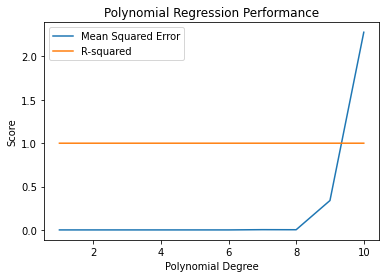

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the supermarket data from CSV
supermarket_data = pd.read_csv("supermarket_sales.csv")

# Select the features and target variable
X = supermarket_data[['Unit price', 'Quantity', 'gross income']]
y = supermarket_data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through different degrees of polynomial features
degrees = range(1, 11)
mse_list = []
r2_list = []

for degree in degrees:
    # Create polynomial features up to the current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate the mean squared error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

# Plot the performance of polynomial regression
plt.plot(degrees, mse_list, label='Mean Squared Error')
plt.plot(degrees, r2_list, label='R-squared')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Polynomial Regression Performance')
plt.legend()
plt.show()


# The above graph suggests that a polynomial degree of 8 or less is the best choice, as higher degrees may result in overfitting.

# Piecewise CubicSpline 

Length of x: 990
Length of y: 990


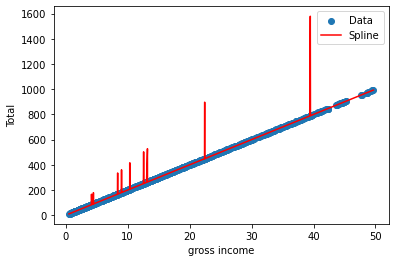

In [46]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')

cols = 'gross income'
df = df.sort_values(by=[cols])

# Obtain unique x-values
x = np.unique(df[cols].values)

# Obtain corresponding y-values
y = df.groupby([cols], sort=False)['Total'].sum().values

print("Length of x:", len(x))
print("Length of y:", len(y))

# Fit the spline
spline = CubicSpline(x, y, bc_type='natural')

# Evaluate the spline at the knots
spline_values = spline(x)

# Plot the original data and the spline
plt.scatter(df[cols], df['Total'], label='Data')
plt.plot(x, spline_values, color='red', label='Spline')
plt.legend()
plt.xlabel(cols)
plt.ylabel('Total')
plt.show()


# The above graph suggests that there is a positive correlation between the gross income and Total. It also suggests that the second derivative of the spline is positive, meaning that the rate of change of the function is increasing.

# Piecewise linearSpline 

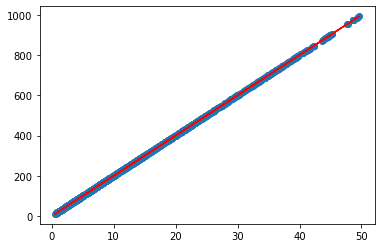

In [48]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data from CSV
df = pd.read_csv('supermarket_sales.csv')

# Define the number of segments
n_segments = 5

# Sort data by the independent variable
df = df.sort_values(by=['Unit price'])

# Calculate the breakpoints
breakpoints = list(range(0, len(df), len(df) // n_segments))
breakpoints.append(len(df))

# Perform piecewise linear regression
models = []
for i in range(n_segments):
    start = breakpoints[i]
    end = breakpoints[i+1]
    segment = df[start:end]
    X = segment['gross income'].values.reshape(-1, 1)
    y = segment['Total'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models.append(model)

# Predict using the models
predictions = []
for i in range(n_segments):
    start = breakpoints[i]
    end = breakpoints[i+1]
    segment = df[start:end]
    X = segment['gross income'].values.reshape(-1, 1)
    pred = models[i].predict(X)
    predictions.append(pred)

# Concatenate the predictions
y_pred = np.concatenate(predictions)

# Plot the data and predictions
import matplotlib.pyplot as plt
plt.scatter(df['gross income'], df['Total'])
plt.plot(df['gross income'], y_pred, color='red')
plt.show()


# The graph suggests that there is a positive linear relationship between gross income and total sales, and the piecewise linear regression captures this relationship by fitting different linear segments to different parts of the data.

# Conclusion

# In this project, we conducted a statistical analysis and predictive modeling on a supermarket sales dataset. The goal was to forecast supermarket sales and gain insights that can boost sales. The project involved various steps and methodologies.

# First, in the data exploration and visualization phase, we examined the dataset and visualized key information using charts and plots. We analyzed customer types, product lines by gender, unit price distribution, and the relationship between quantity and total sales. These visualizations helped us understand the data and identify potential patterns.

# Next, we applied statistical tests such as t-test, ANOVA, and chi-square to explore relationships and differences within the dataset. The t-test revealed a significant relationship between gender and total sales, indicating that gender can be a good predictor of sales. However, the ANOVA test did not find a significant difference in sales across different cities. The chi-square test showed no significant relationship between gender and customer type.

# We also employed machine learning techniques, including linear regression, to predict future sales. The linear regression model demonstrated excellent performance, with a high R-squared value indicating a strong fit to the data. This suggests that the model is capable of accurately predicting the total sales based on the given features.

# Furthermore, we utilized resampling methods such as bootstrapping and cross-validation to evaluate the performance and reliability of our predictive models. These methods provided insights into the overall sales and assessed the accuracy and reliability of the models.

# Additionally, we explored advanced techniques such as linear model selection and regularization, as well as non-linear regression methods like polynomial regression and piecewise splines. These approaches allowed us to capture complex relationships and improve the models' predictive capabilities.

# In conclusion, this project successfully analyzed the supermarket sales dataset, identified significant variables impacting sales, and developed predictive models to forecast future sales. The findings and insights obtained from this analysis can help supermarkets better understand their customers and make data-driven decisions to improve sales and customer satisfaction.